
# Pipeline de Machine Larning - Model

0  - Importar Bibliotecas
1  - Carregar os dados brutos
2  - Excluir linhas e colunas
3  - Transformar categoria em numero (vetor)
4  - Separar as Features de entrada
5  - Treinar o modelo com validação cruzada
6  - Metricas do modelo
7  - Teste com dados de Validação
8  - Métricas por categoria
9  - Salvar modelo final


## 0 - Importar Bibliotecas

In [ ]:
# Bibliotecas

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

import pickle 

## 1 - Carregar os dados brutos

In [ ]:
# Carga do dataset

sample_products_csv = os.environ['DATASET_PATH']
df = pd.read_csv(sample_products_csv)

In [ ]:
# Informações gerais

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         38000 non-null  int64  
 1   seller_id          38000 non-null  int64  
 2   query              38000 non-null  object 
 3   search_page        38000 non-null  int64  
 4   position           38000 non-null  int64  
 5   title              38000 non-null  object 
 6   concatenated_tags  37998 non-null  object 
 7   creation_date      38000 non-null  object 
 8   price              38000 non-null  float64
 9   weight             37942 non-null  float64
 10  express_delivery   38000 non-null  int64  
 11  minimum_quantity   38000 non-null  int64  
 12  view_counts        38000 non-null  int64  
 13  order_counts       17895 non-null  float64
 14  category           38000 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 4.3+ MB


In [ ]:
df

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37995,13230578,1756482,mochila personalizada galinha pintadinha,1,2,Mochila Galinha Pintadinha M,primaria 2019 1 aninho abdulzinho mochilas ani...,2016-09-17 10:49:39,18.790000,149.0,1,27,321,NaN,Lembrancinhas
37996,6736914,9301388,tag dia dos pais,1,32,30 TAGS DIA DOS PAIS 005,dia pais,2019-06-12 17:03:52,31.680000,7.0,1,1,43,NaN,Papel e Cia
37997,11017911,8732362,kit bolsa maternidade,5,31,Kit bolsa bebê maternidade personalizada,paula carvalho bebe,2018-08-24 11:43:00,543.170000,3006.0,1,4,515,18.0,Bebê
37998,6807331,1869417,festa 15 anos,1,8,Chaveiro Almofada 15 anos,yasmin centro mesa compras 15 anos 2020 lembra...,2017-10-21 18:49:56,10.720000,18.0,1,53,2456,138.0,Lembrancinhas


In [ ]:
df.columns.to_list()

['product_id',
 'seller_id',
 'query',
 'search_page',
 'position',
 'title',
 'concatenated_tags',
 'creation_date',
 'price',
 'weight',
 'express_delivery',
 'minimum_quantity',
 'view_counts',
 'order_counts',
 'category']

In [ ]:
# Excluir colunas

df.drop(columns=['product_id',
                 'seller_id',
                 'query',
                 'title',
                 'concatenated_tags',
                 'creation_date',
                 'express_delivery',
                 'order_counts'], inplace=True)

In [ ]:
##  Data de registro do produto na plataforma Elo7

print(max(df['creation_date']))
print(min(df['creation_date']))

search_page          0
position             0
price                0
weight              58
minimum_quantity     0
view_counts          0
category             0
dtype: int64


### Estatística descritiva dos campos numéricos

- Medidas de centralidade
- Correlação


In [ ]:
df.describe()

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
count,3.800000e+04,3.800000e+04,38000.000000,38000.000000,38000.000000,37942.000000,38000.000000,38000.000000,38000.000000,17895.000000
mean,8.345497e+06,5.008433e+06,1.491447,16.887368,84.042358,360.885799,0.780421,14.602263,546.603895,27.410673
std,4.836141e+06,2.947651e+06,0.979852,11.589415,212.491007,1809.632834,0.413967,43.970316,1423.711338,60.794616
min,3.610000e+02,8.170000e+02,1.000000,0.000000,0.070000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.142094e+06,2.469703e+06,1.000000,6.000000,12.750000,6.000000,1.000000,3.000000,118.000000,8.000000
50%,8.378994e+06,4.917720e+06,1.000000,16.000000,28.500000,9.000000,1.000000,7.000000,242.000000,15.000000
75%,1.253675e+07,7.636478e+06,2.000000,27.000000,90.000000,107.000000,1.000000,16.000000,521.000000,26.000000
max,1.669295e+07,1.011887e+07,5.000000,38.000000,11509.380000,65009.000000,1.000000,3000.000000,45010.000000,2460.000000


In [ ]:
y = df['category']
df_y = LabelBinarizer().fit_transform(y)
print(df_y)

[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 ...
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]]


## 4 - Features de entrada

In [ ]:
df_x = df.drop(['category'], axis=1).values

In [ ]:
df_x

<AxesSubplot:>

## 5 - Treinar modelo com validação cruzada

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1846, in balanced_accuracy_score
    C = confusion_matrix(y_true, y

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1846, in balanced_accuracy_score
    C = confusion_matrix(y_true, y

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1846, in balanced_accuracy_score
    C = confusion_matrix(y_true, y

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1846, in balanced_accuracy_score
    C = confusion_matrix(y_true, y

nan

RandomForestClassifier(max_depth=20, n_estimators=200)

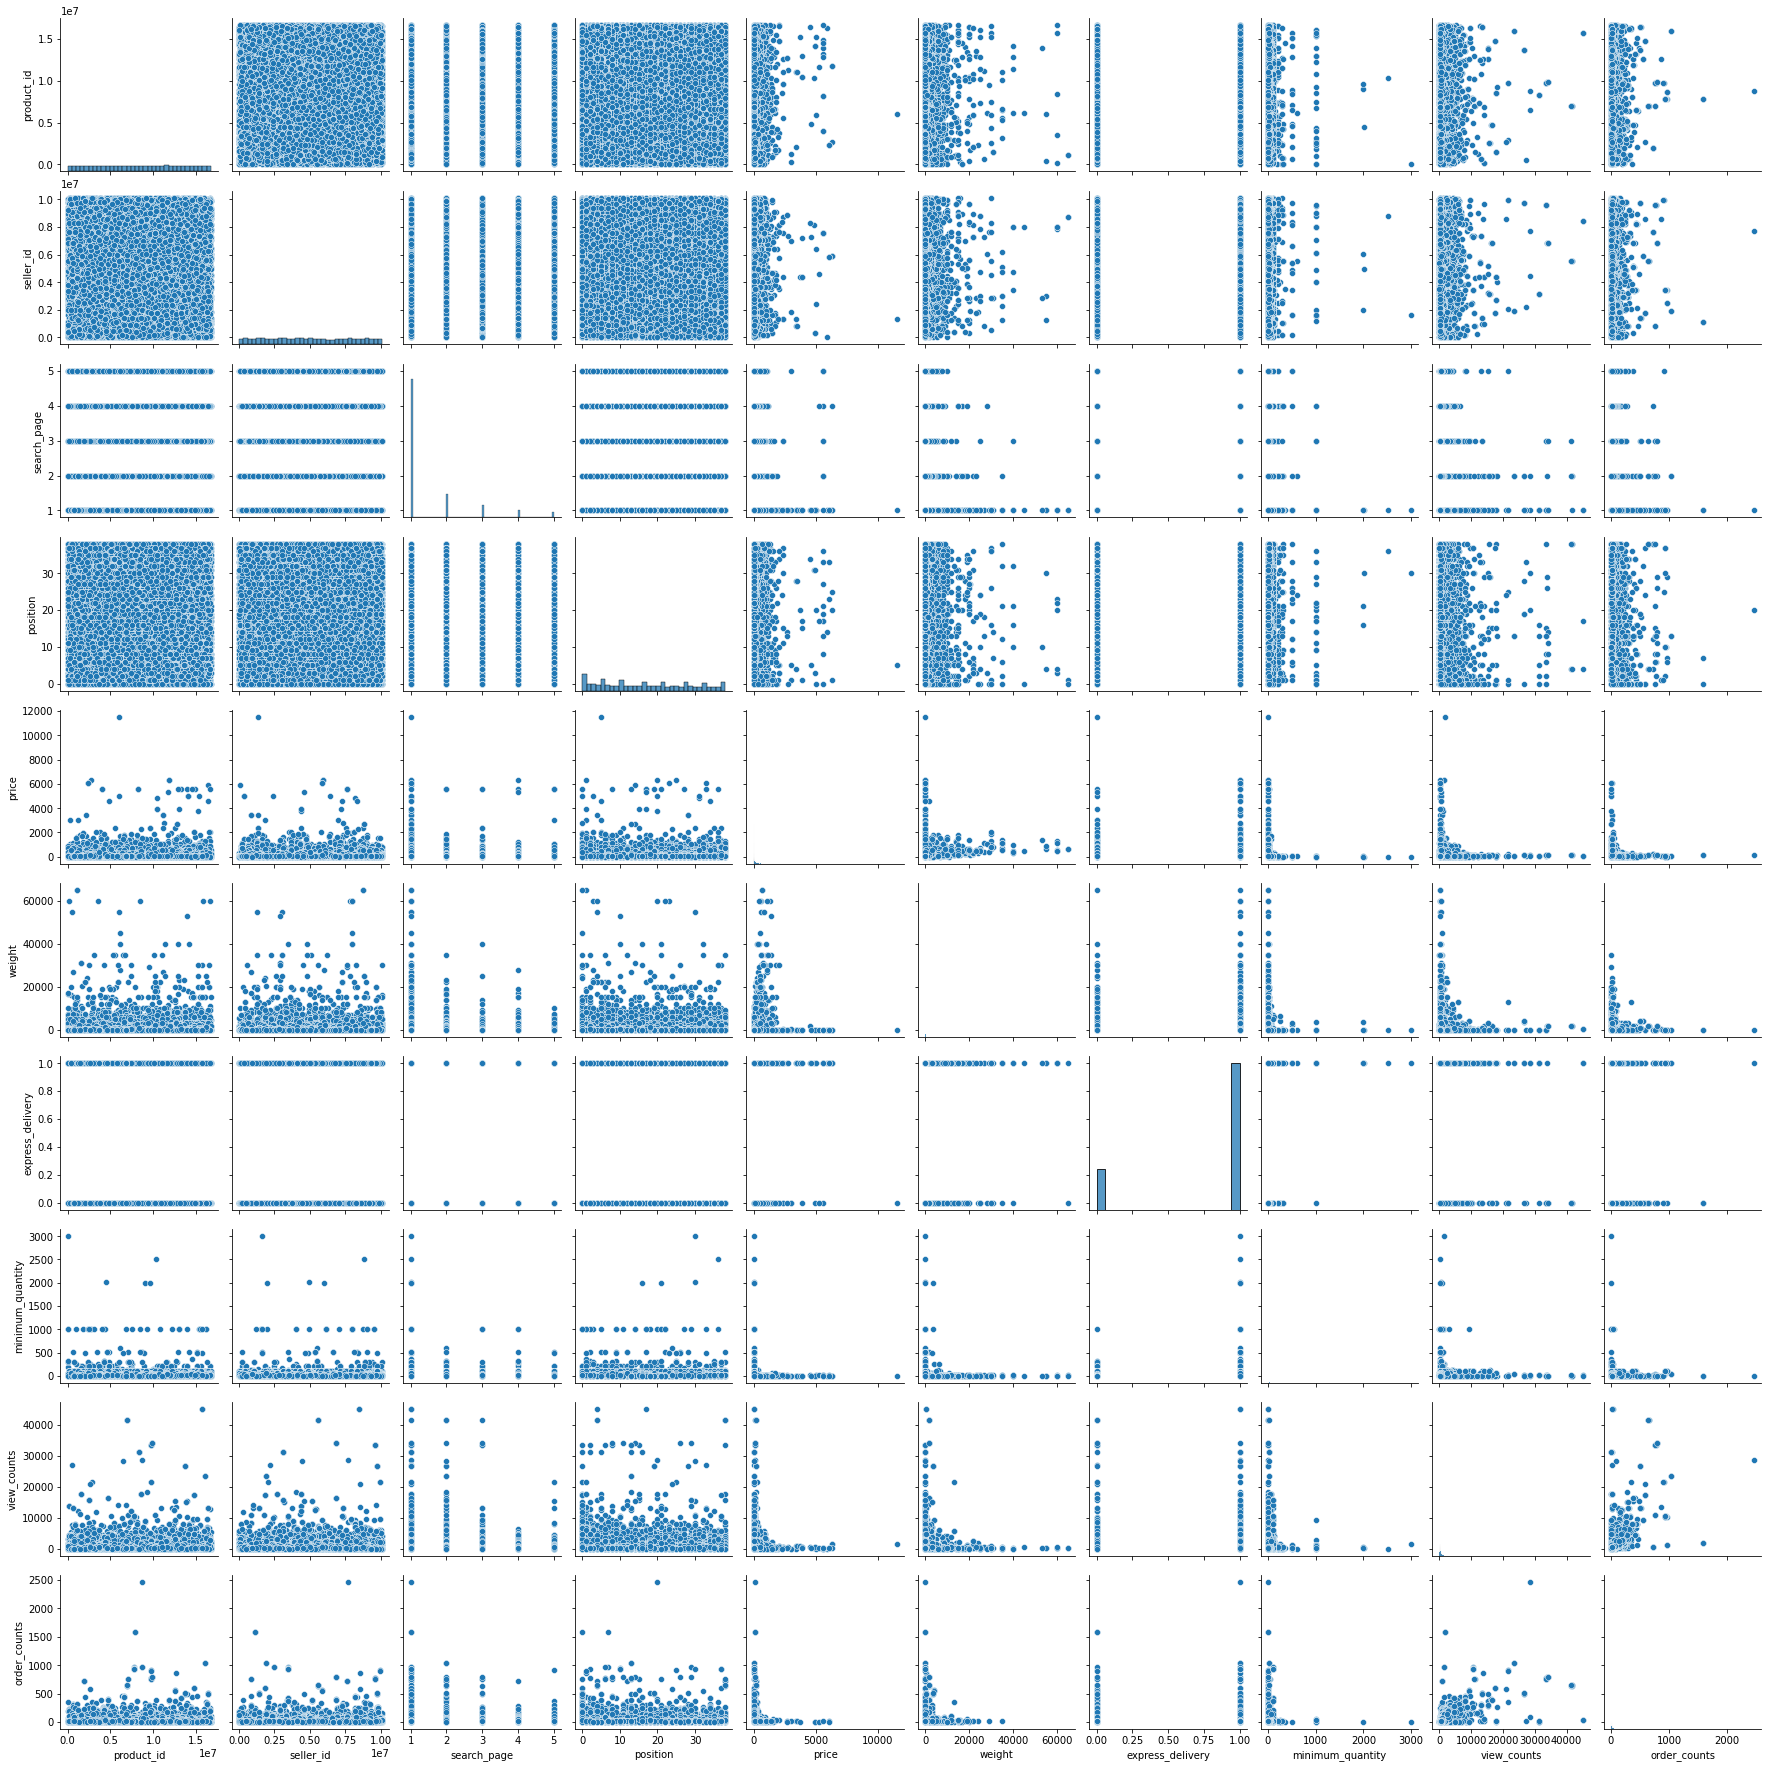

In [ ]:
sns.pairplot(data=df, kind="scatter", palette="Set1")

## 6 - Metricas do modelo

In [ ]:
models = []
models.append(('RANDOM', RandomForestClassifier(max_depth=20, n_estimators=200)))

In [ ]:
def run_experiments(X, y, models) -> pd.DataFrame:
    
    dfs = []
    results = []
    names = []
    seed = 10
    
    # métricas de avaliação
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    
    # tipo de particionamento
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
    
    # para cada modelo/algoritmo ...
    for name, model in models:
        cv_results = model_selection.cross_validate(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [ ]:
df_results = run_experiments(df_x, df_y, models)

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df['query'].value_counts()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,59.452584,4.853355,0.521281,0.707241,0.521281,0.568802,0.823109,RANDOM
1,49.177058,3.841128,0.520490,0.740054,0.520490,0.571765,0.825497,RANDOM
2,46.674433,3.793393,0.514628,0.722974,0.514628,0.566426,0.820192,RANDOM
3,47.102132,3.741095,0.523326,0.698741,0.523326,0.566952,0.820265,RANDOM
4,46.088916,3.853582,0.514497,0.714879,0.514497,0.559978,0.819863,RANDOM


In [ ]:
# Salvar Máquina Preditiva
model_pkl = os.environ['MODEL_PATH']

pickle_out = open(model_pkl, mode = "wb") 
pickle.dump(forest, pickle_out) 
pickle_out.close()

In [ ]:
# RESULTADO POR MODELO

resultados_por_modelo = []
for model in list(set(df_results.model.values)):
    model_df = df_results.loc[df_results.model == model]
    resultados_por_modelo.append(model_df)

# DATAFRAME DOS RESULTADOS

df_final = pd.concat(resultados_por_modelo, ignore_index=True)

# MÉTRICA DOS RESULTADOS

results_long = pd.melt(df_final,id_vars=['model'],var_name='metrics', value_name='values')

# RESULTADOS POR TEMPO E SCORE

time_metrics = ['fit_time','score_time']

  # CLASSIFICAÇÃO
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')
  # TEMPO
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')


Lembrancinha Batizado                                66
Caneta Personalizada                                 58
Caneca Personalizada - Lembrancinha Personalizada    56
Lembrancinha Maternidade                             52
Caneca Dia dos Pais                                  52
                                                     ..
Caneca Pai Para Uso Exclusivo do Melhor               1
Organizador de brinquedos emoji                       1
Adesivo Recorte Vitrine Dia dos pais                  1
Dia dos Pais - Charutos Chocolate caixa               1
Tapete em croche para cozinha                         1
Name: title, Length: 25113, dtype: int64

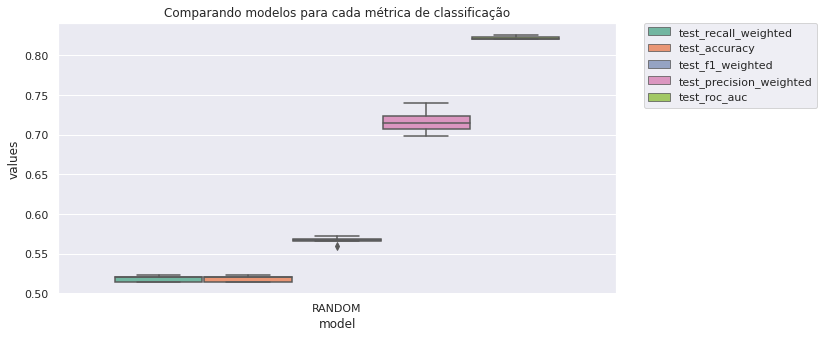

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparando modelos para cada métrica de classificação')

dia pais                                                                         802
lembrancinhas                                                                    195
batizado                                                                         115
tapetes                                                                           88
decoracao                                                                         71
                                                                                ... 
frases quadro familia quadro frases decoracao casa quadro frases temas             1
dossel mosquiteiro baby mosquiteiro teto mosquiteiro dossel                        1
helena j vinicius leonardo bolsa maternidade menino kit maternidade                1
smash the cake designer moda newborn tapa fraldas bita princesinha mundo bita      1
kits variados coruja festa pijama lembrancinha                                     1
Name: concatenated_tags, Length: 22795, dtype: int64

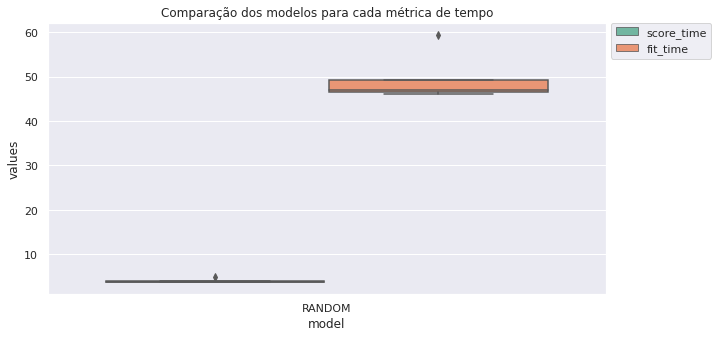

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set2")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title('Comparação dos modelos para cada métrica de tempo')

## 7 - Validação

In [ ]:
# Carga do Dataset de validação

test_products_csv = os.environ['TEST_PATH']
df_test = pd.read_csv(test_products_csv)

In [ ]:
df_test.head(3)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,4973768,2484177,lembrancinhas de 15 anos,5,8,Lembrancinha 15 anos - Lembrancinha de 15 anos,15 anos,2019-02-02 10:28:57,14.180000,10.0,1,13,91,NaN,Lembrancinhas
1,14180109,3191400,prateleira,1,32,Trio de Nichos Prateleira,prateleiras decoracao gaveteiros nichos pratel...,2017-08-23 22:17:01,97.060005,7492.0,1,1,729,32.0,Decoração
2,5058490,1414443,lembrancinhas vingadores,2,19,Caixa meia bala Vingadores,vingadores super herois,2017-05-28 04:26:03,11.580000,0.0,1,13,92,NaN,Lembrancinhas


In [ ]:
# Excluir colunas

df_test.drop(columns=['product_id',
                 'seller_id',
                 'query',
                 'title',
                 'concatenated_tags',
                 'creation_date',
                 'express_delivery',
                 'order_counts'], inplace=True)

In [ ]:
y_test = df_test['category']
df_y_test = LabelBinarizer().fit_transform(y_test)
print(df_y)

[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 ...
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]]


In [ ]:
df_x_test = df_test.drop(['category'], axis=1).values

## - Salvar modelo final

In [ ]:
forest.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200)

In [ ]:
#Comando de Salvamento da Máquina Preditiva
model_pkl = os.environ['MODEL_PATH']

pickle_out = open(model_pkl, mode = "wb") 
pickle.dump(forest.best_estimator_, pickle_out) 
pickle_out.close()